<a href="https://colab.research.google.com/github/kuach-byte/MLminiprojectz/blob/main/network_intrusion_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_file = '/content/drive/MyDrive/network_intrusion01.csv'

Data Preparation and cleaning


1.   load file with pandas
2.   look at file info
3.   fix missing or incorrect values
4.   handle duplicates



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(data_file)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [ ]:
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

78

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

,0
Flow Bytes/s,0.000018
Flow Duration,0.000000
Destination Port,0.000000
Total Backward Packets,0.000000
Total Length of Fwd Packets,0.000000
...,...
Idle Mean,0.000000
Idle Std,0.000000
Idle Max,0.000000
Idle Min,0.000000


<Axes: >

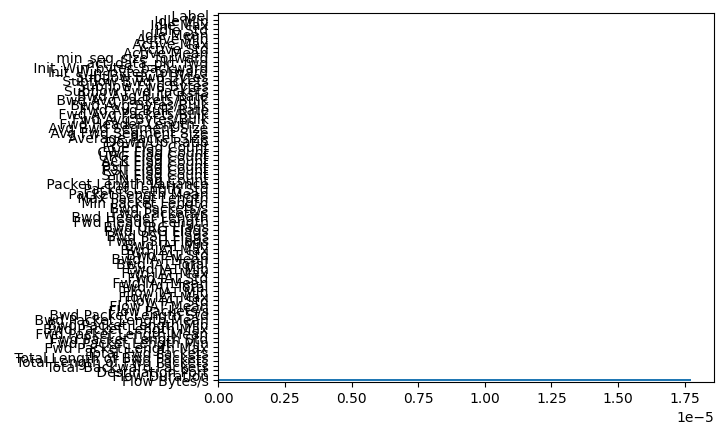

In [ ]:
missing_percentages.plot(kind='barh')

<Axes: >

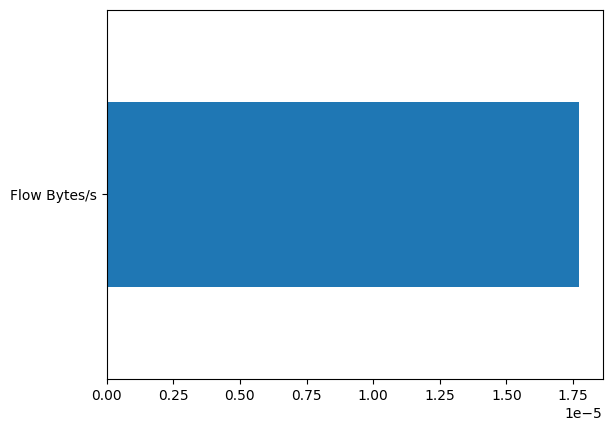

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [ ]:
df[df.isnull().any(axis=1)]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
6796,36812,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
14739,53581,0,1,1,0,0,0,0,0.0,0.0,...,44,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
15047,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
209728,18467,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.dropna(inplace=True)


In [ ]:
duplicates = df.duplicated()
duplicatescount = duplicates.sum()
duplicatescount
df = df.drop_duplicates()
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Exploratory Analysis and Visualization

In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

Columns to analyse and visualise
1. Destinatin Port
2. Flow Duration
3. Total Fwd packets
4. Total Backward Packets
5. Total Length of Fwd Packets
6. Total Length of Bwd Packets
7. Label

In [ ]:
df.rename(columns={
    ' Destination Port': 'destination_port',
    ' Flow Duration': 'flow_duration',
    ' Total Fwd Packets': 'total_fwd_packets',
    ' Total Backward Packets': 'total_bwd_packets',
    'Total Length of Fwd Packets': 'total_length_fwd_packets',
    ' Total Length of Bwd Packets': 'total_length_bwd_packets',
    ' Label': 'label'
}, inplace=True)


<ipython-input-15-6bbb02982247>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [ ]:
df.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_bwd_packets', 'total_length_fwd_packets',
       'total_length_bwd_packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',

Label Distribution

([0, 1], [Text(0, 0, 'DDoS'), Text(1, 0, 'BENIGN')])

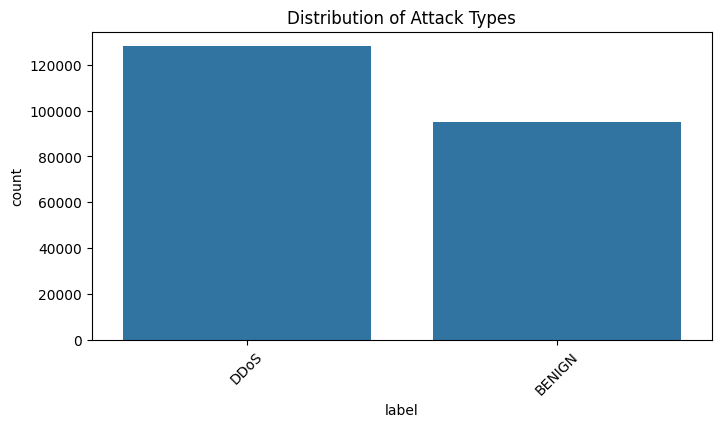

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xticks(rotation=45)


Feature Target Relationship

In [ ]:
df.destination_port

,destination_port
0,54865
1,55054
2,55055
3,46236
4,54863
...,...
225740,61374
225741,61378
225742,61375
225743,61323


In [ ]:
unique_d_p = df.destination_port.unique()
unique_d_p[:100]

array([54865, 55054, 55055, 46236, 54863, 54871, 54925,  9282, 55153,
       55143, 55144, 55145, 55254, 36206, 53524, 53526, 53527, 53528,
       55035, 55275, 55277,  8850, 43248,  8678, 55063, 55203, 55140,
       55180, 55156, 55096, 55085,  8689,  8817,  8816,  8886, 60350,
       60346, 60352,  8833,  9331,  9175,  8693,  8695,  8690,  8694,
       57683, 57662, 54864, 57680, 60954, 57681, 55270, 55271, 57674,
       50485, 57686, 33666,  8883,  8884, 55245, 55150, 55043, 55040,
       55039,    53,    21, 34805,   139,   443,    80,   445,  8080,
          22,   465,   123,   137,   389,  3268, 38044, 50038, 38354,
       38364, 55213, 55262, 55263, 55178, 56501,  9241, 41956, 41976,
       41978, 42006, 42026, 42092, 42106, 42152, 42156, 42222, 42228,
       42292])

In [ ]:
d_p_by_label = df.groupby('destination_port')['label'].value_counts()
d_p_by_label[:30]

destination_port  label 
0                 BENIGN        54
21                BENIGN       143
22                BENIGN       317
42                BENIGN         3
53                BENIGN     30302
80                DDoS      128013
                  BENIGN      8548
88                BENIGN       170
123               BENIGN       361
135               BENIGN        23
137               BENIGN       136
138               BENIGN        44
139               BENIGN        99
389               BENIGN       258
443               BENIGN     13114
445               BENIGN        48
465               BENIGN       129
1124              BENIGN         5
3268              BENIGN        91
3289              BENIGN         5
5117              BENIGN         3
5118              BENIGN         1
5353              BENIGN        16
5993              BENIGN         2
6131              BENIGN         3
6341              BENIGN         2
6373              BENIGN         2
6724              BENIGN         2
6756              BENIGN         3
7973              BENIGN         5
Name: count, dtype: int64

BAR CHART FOR DISTRIBUTION OF DESTINATION PORT

Shows the top 10 most frequent ports

Groups the rest under "Others"

<ipython-input-21-4a9d61df62b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Port Group'] = df['destination_port'].apply(lambda x: x if x in top_ports.index else 'Others')


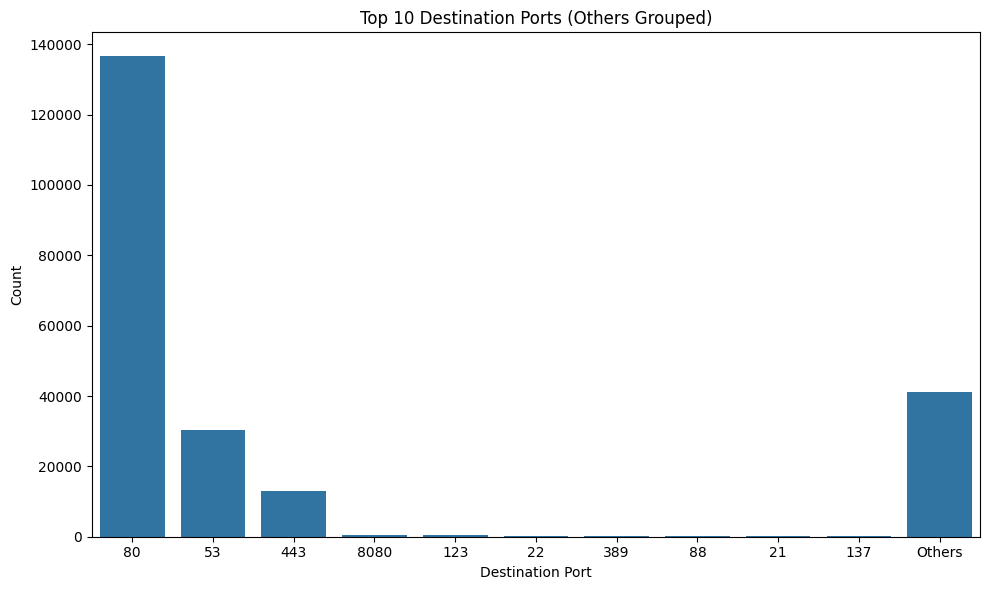

In [ ]:
top_ports = df['destination_port'].value_counts().nlargest(10)
df['Port Group'] = df['destination_port'].apply(lambda x: x if x in top_ports.index else 'Others')

plt.figure(figsize=(10, 6))
sns.countplot(x='Port Group', data=df, order=list(top_ports.index) + ['Others'])
plt.title('Top 10 Destination Ports (Others Grouped)')
plt.xlabel('Destination Port')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Destibution port per label
countplot grouped by Label

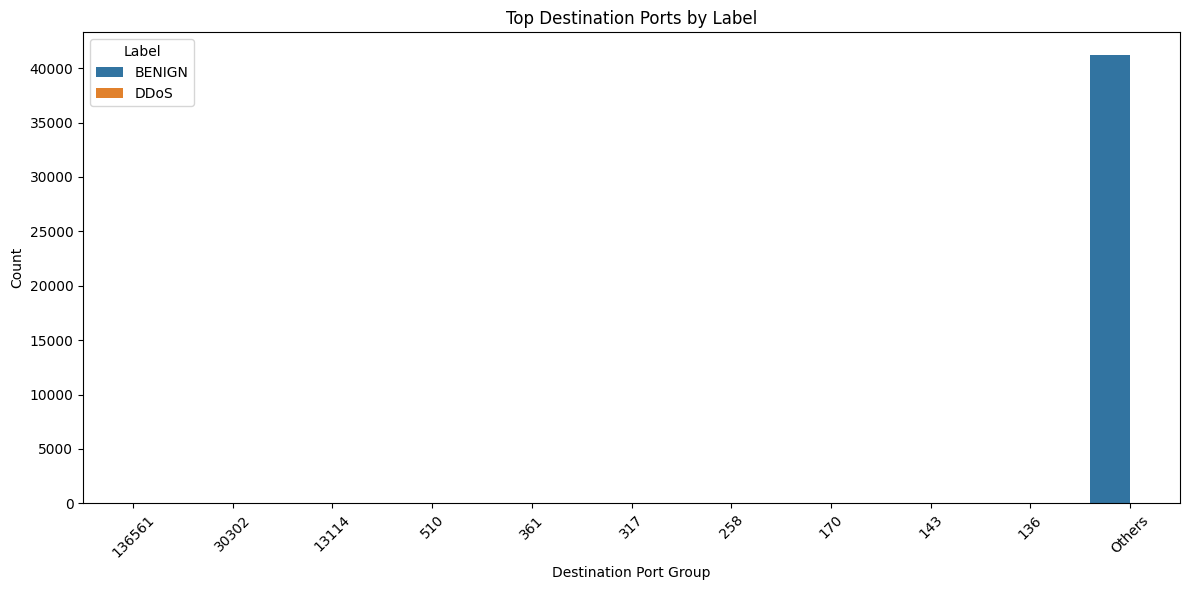

In [ ]:


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Port Group', hue='label', order=list(top_ports) + ['Others'])
plt.title('Top Destination Ports by Label')
plt.xlabel('Destination Port Group')
plt.ylabel('Count')
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation

Almost all traffic is grouped under "Others", and it's exclusively BENIGN.
Only a tiny amount of DDoS traffic is present (if any), and not in the "Others" group.
There is alot of BENIGN compared to DDos indicating Class Imbalance

Consequences

1. Poor detection of DDos.

2. Misleading accuracy.

3. Bias in model training.

Flow Duration

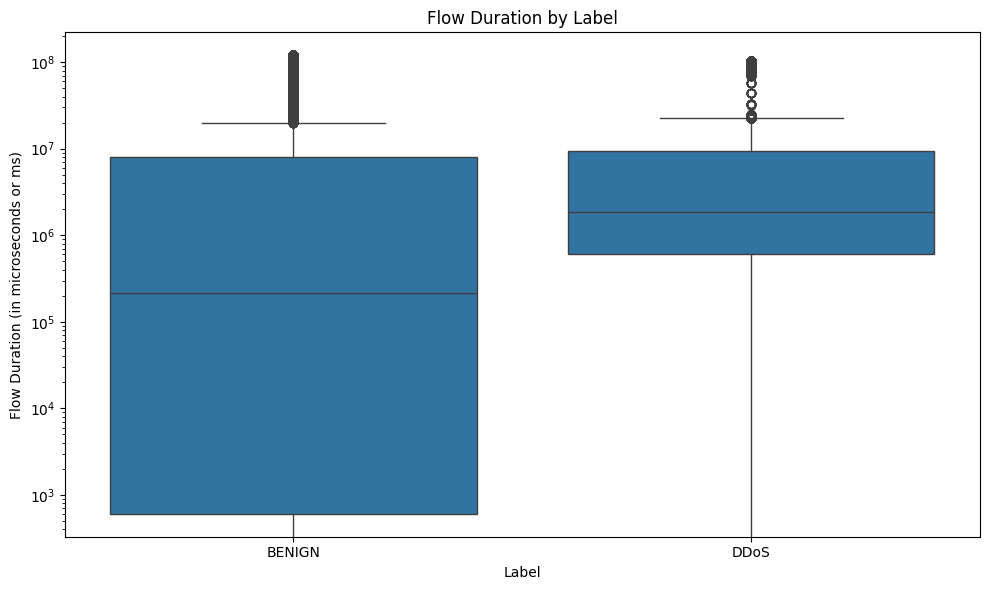

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='flow_duration')
plt.title('Flow Duration by Label')
plt.ylabel('Flow Duration (in microseconds or ms)')
plt.xlabel('Label')
plt.yscale('log')
plt.tight_layout()
plt.show()

Insights
1. BENIGN traffic is highly variable, with many short and a few very long flows.
2. DDoS traffic is more uniform, with most flows having similar and longer durations.

 flow_duration is a useful feature for distinguishing between normal and attack traffic.

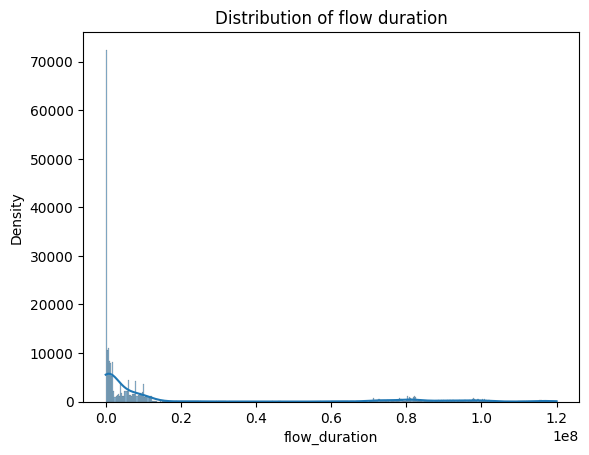

In [ ]:
sns.histplot(df['flow_duration'], kde=True)
plt.title('Distribution of flow duration')
plt.xlabel('flow_duration')
plt.ylabel('Density')
plt.show()

1. flow_duration is heavily right-skewed with a long tail extending towards the right
2. Outliers are evident from the long tail and the isolated peaks far from the main cluster on the right-hand side of the plot (e.g., around 0.8e8 and 1.0e8). These values are extremely far from the mode of the distribution.

# Total fwd packets

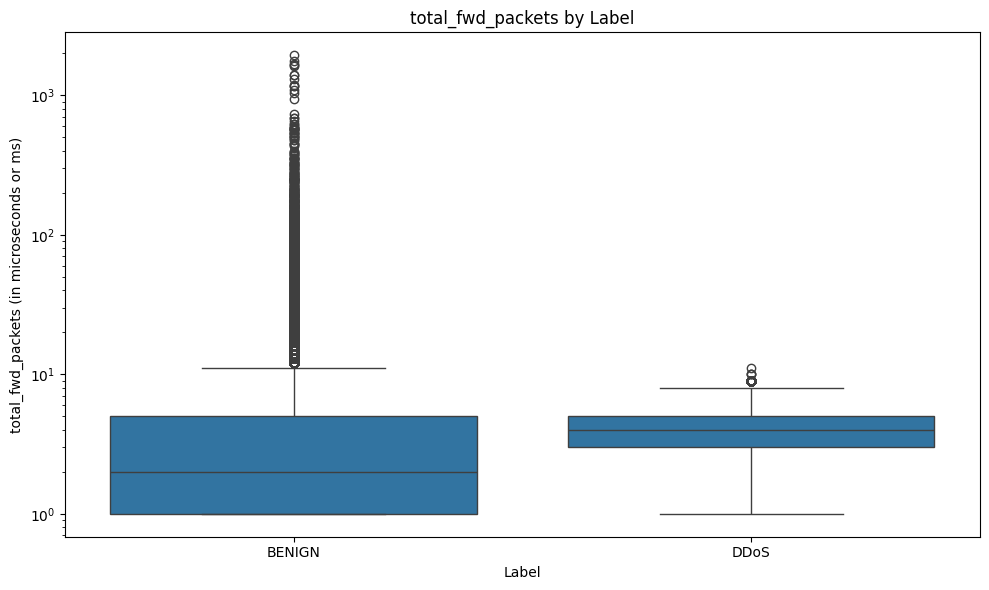

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='total_fwd_packets')
plt.title('total_fwd_packets by Label')
plt.ylabel('total_fwd_packets (in microseconds or ms)')
plt.xlabel('Label')
plt.yscale('log')
plt.tight_layout()
plt.show()

BENIGN CLASS
1.  Median is low, likely around 1–2 packets.
2.  The box is small, meaning most of the data is tightly clustered.
3.  Very large number of outliers extending far upward — hundreds or thousands of outliers beyond the upper whisker (which typically ends at 1.5×IQR above the 75th percentile).

Suggests heavy-tailed distribution and significant variance.

DDOS CLASS
1.  Median is higher than BENIGN — likely around 7–10 packets.
2.  The spread is also tight, with fewer outliers.
3.  Far fewer extreme values compared to BENIGN.

Total fwd packets is a good featute for modeling if combined with other features. Reasons include:
1.  DDoS and BENIGN flows have different distributions of total_fwd_packets.
2.  Benign traffic is more variable, showing more user-driven or irregular patterns. The DDoS traffic appears more tightly clustered.
3.  The large number of outliers in benign traffic may indicate user-generated traffic with diverse behaviors, making this variability a possible distinguishing trait.
OUTLIERS WILL BE KEPT FOR TOTAL FWD PACKETS

TOTAL BWD PACKETS

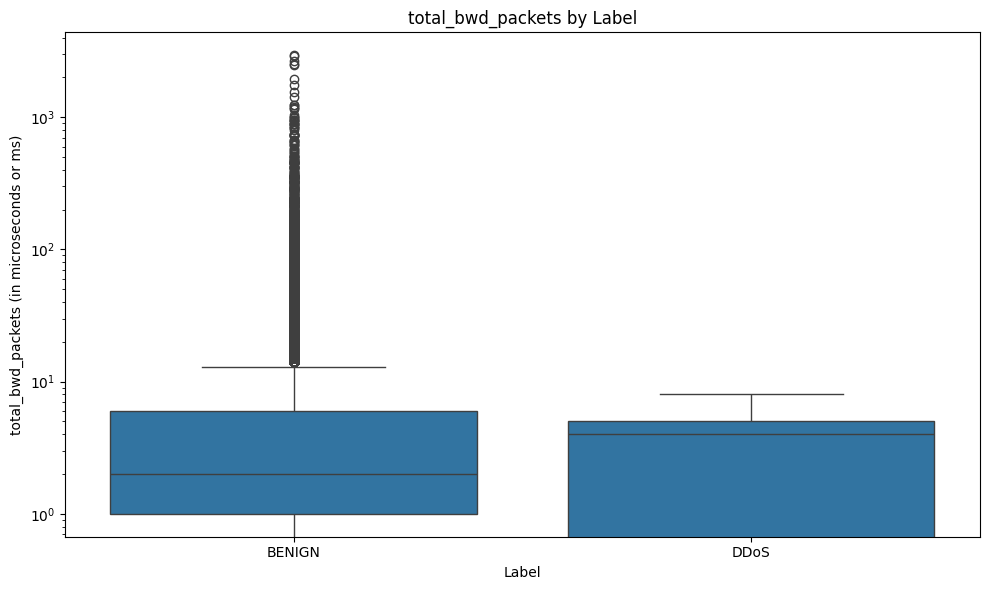

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='total_bwd_packets')
plt.title('total_bwd_packets by Label')
plt.ylabel('total_bwd_packets (in microseconds or ms)')
plt.xlabel('Label')
plt.yscale('log')
plt.tight_layout()
plt.show()

BENIGN CLASS
1.  Has a wider range and much more variation.
2.  A large number of outliers with extremely high values (in the thousands).
3.  Median is lower, but overall distribution is long-tailed (heavy with high values).

DDOD CLASS
1.  Much more compressed distribution.
2.  No extreme outliers.
3.  Median and IQR (interquartile range) are higher than BENIGN's core distribution, but less spread.

Why it's a Good feature for classification
1.  DDoS attacks are often one-directional (mostly sending, not receiving), so low backward packet counts are expected.
2.  BENIGN traffic tends to be more interactive, leading to higher and more variable backward packet counts.
3.  The outliers in BENIGN are likely real responses in normal two-way communication.

total_length_fwd_packets

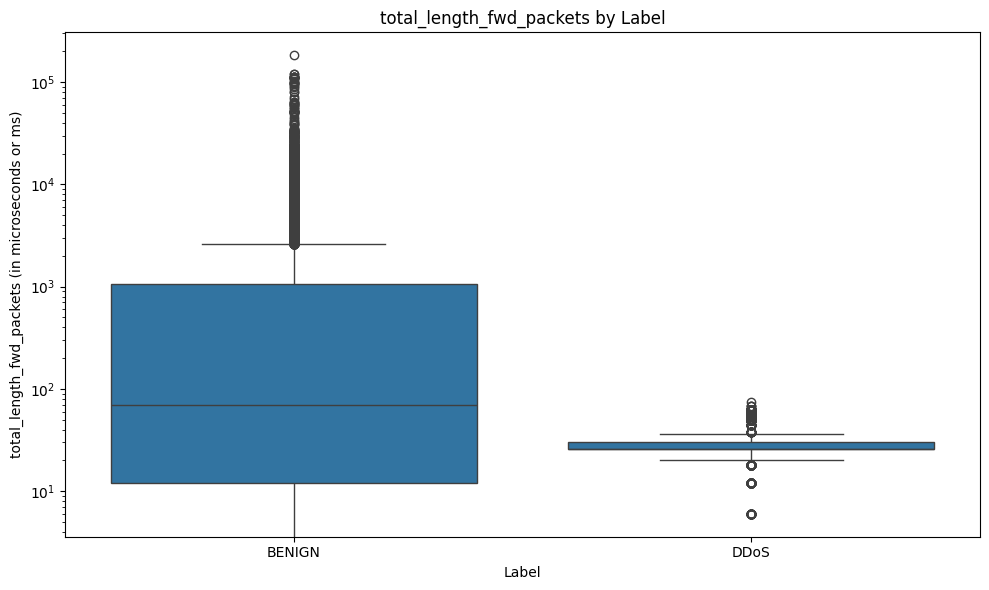

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='total_length_fwd_packets')
plt.title('total_length_fwd_packets by Label')
plt.ylabel('total_length_fwd_packets (in microseconds or ms)')
plt.xlabel('Label')
plt.yscale('log')
plt.tight_layout()
plt.show()

 Key Observations
1. BENIGN Traffic:
Distribution is very wide, from about 1 to over 100,000.

Median is around 70–100.

Outliers: There are many outliers in the upper range (points beyond the whiskers).

The large spread and many outliers suggest a right-skewed distribution (long tail on the right).

2. DDoS Traffic:
Distribution is much tighter, mostly between 20–40.

Median is near 30.

Outliers are also present but much fewer and less extreme than in the BENIGN class.

Suggests a more concentrated or compact distribution, possibly slightly right-skewed.

total_length_bwd_packets

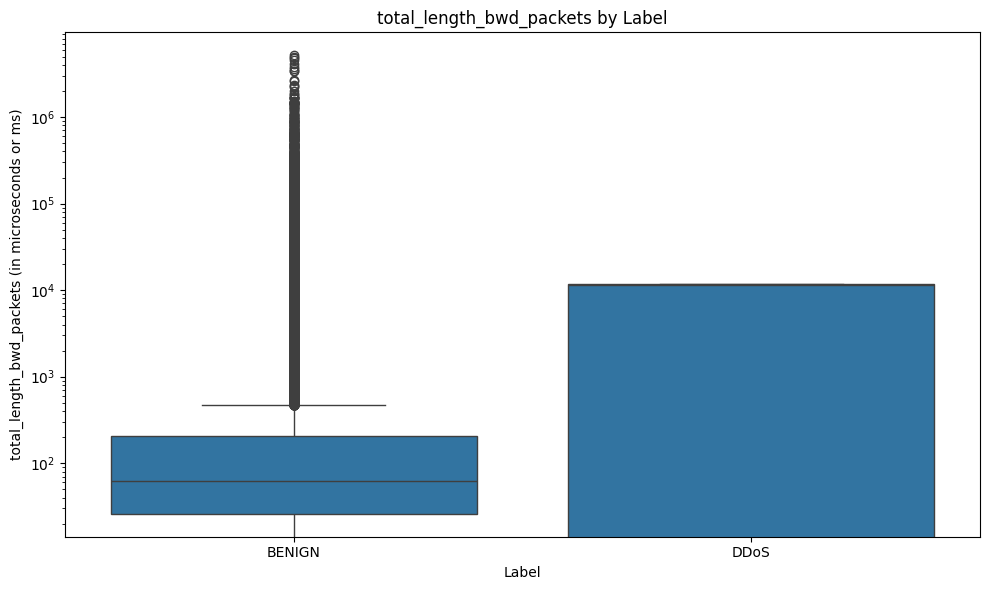

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='total_length_bwd_packets')
plt.title('total_length_bwd_packets by Label')
plt.ylabel('total_length_bwd_packets (in microseconds or ms)')
plt.xlabel('Label')
plt.yscale('log')
plt.tight_layout()
plt.show()

Relationship between all the seven features

In [ ]:

df_clean = df.copy()

df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.dropna(subset=[
    'flow_duration',
    'total_fwd_packets',
    'total_bwd_packets',
    'total_length_fwd_packets',
    'total_length_bwd_packets'
], inplace=True)

df_clean.loc[:, 'log_flow_duration'] = np.log1p(df_clean['flow_duration'])
df_clean.loc[:, 'log_total_fwd_packets'] = np.log1p(df_clean['total_fwd_packets'])
df_clean.loc[:, 'log_total_bwd_packets'] = np.log1p(df_clean['total_bwd_packets'])
df_clean.loc[:, 'log_total_length_fwd_packets'] = np.log1p(df_clean['total_length_fwd_packets'])
df_clean.loc[:, 'log_total_length_bwd_packets'] = np.log1p(df_clean['total_length_bwd_packets'])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


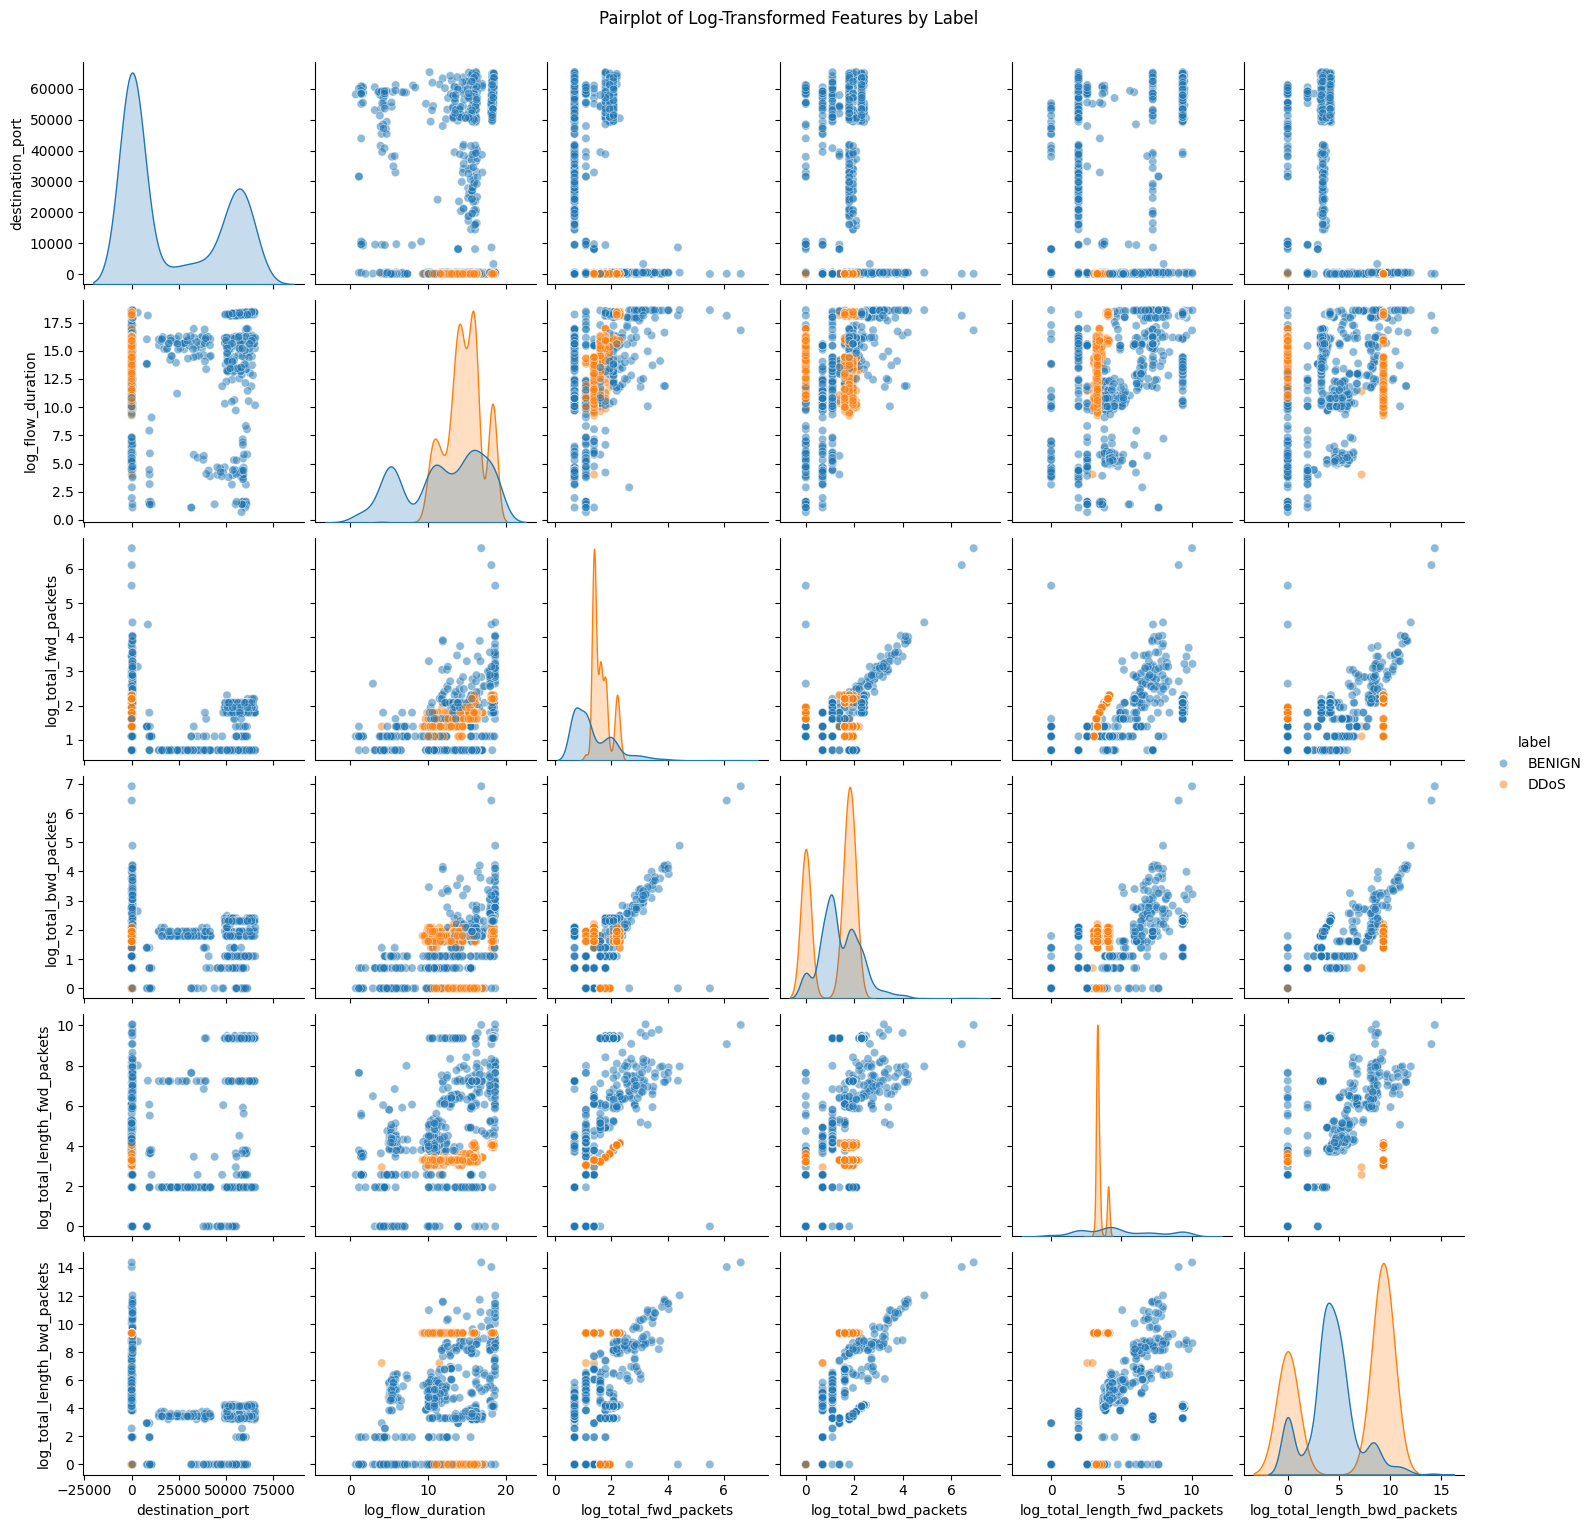

In [ ]:
sample = df_clean.sample(2000, random_state=42)

log_features = [
    'destination_port',
    'log_flow_duration',
    'log_total_fwd_packets',
    'log_total_bwd_packets',
    'log_total_length_fwd_packets',
    'log_total_length_bwd_packets',
    'label'
]

sns.pairplot(sample[log_features], hue='label', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Log-Transformed Features by Label', y=1.02)
plt.show()

Scatter plot insights
1. Class Distribution
Orange vs Blue density difference: In features like log_total_length_bwd_packets and log_total_length_fwd_packets, DDoS attacks (orange) have sharper, narrower distributions compared to BENIGN.

Some plots (e.g., log_total_fwd_packets vs log_total_bwd_packets) show DDoS points clustered in a narrow region, indicating more uniform behavior during attacks.

2. Separability
Features like log_total_length_bwd_packets show visible separation between BENIGN and DDoS traffic on the diagonal and in scatter plots.

Several scatter plots show distinct clusters or boundaries where DDoS and BENIGN samples concentrate differently.

3. Correlation
log_total_fwd_packets and log_total_length_fwd_packets appear strongly positively correlated, which makes sense (more packets, more length).

Similarly, log_total_bwd_packets and log_total_length_bwd_packets are also correlated.

4. Outliers
Features like destination_port show many zeroes or highly skewed values (even after transformation), suggesting outlier behavior or concentration on common ports.

Insights for Intrusion Detection
1. Strong Feature Clustering in DDoS Traffic
Observation: DDoS samples (orange) tend to cluster tightly in narrow regions across many features (e.g., log_total_bwd_packets, log_total_length_bwd_packets).

ML Value: Such clustering makes it easier for ML classifiers (like decision trees, SVMs, or neural nets) to separate DDoS from benign using decision boundaries.

2. Clear Separation in Feature Distributions
Observation: Some features (e.g., log_total_length_bwd_packets, log_total_length_fwd_packets) show distinct density peaks between classes.

ML Value: These features provide high information gain for models like Random Forests and Boosting algorithms.

3. High Correlation Between Fwd/Bwd Packets and Their Lengths
Observation: log_total_fwd_packets ↔ log_total_length_fwd_packets and log_total_bwd_packets ↔ log_total_length_bwd_packets are strongly correlated.

ML Value: Redundant features could be combined or one removed via PCA or feature selection to reduce dimensionality and avoid overfitting.

4. Low Variability in Attack Traffic
Observation: DDoS traffic displays low variance across multiple features.

ML Value: Models like K-Means, One-Class SVM, or Isolation Forest can exploit this low variability to flag anomalies.

5. Log-Transformation Enhanced Class Separability
Observation: Log-transformed features show better visual separability than raw skewed features.

ML Value: Improves the performance of models sensitive to feature scaling (e.g., KNN, Logistic Regression, Neural Networks).

6. Port Behavior Anomalies
Observation: destination_port is mostly zero or sharply clustered.

ML Value: Certain ports (e.g., 80, 443) could be disproportionately targeted in DDoS attacks; useful for feature engineering or port-based rules.

The following features appear most informative:

log_total_length_bwd_packets

log_total_length_fwd_packets

log_total_bwd_packets

log_total_fwd_packets

log_flow_duration



In [ ]:
features = [
    'destination_port',
    'flow_duration',
    'total_fwd_packets',
    'total_bwd_packets',
    'total_length_fwd_packets',
    'total_length_bwd_packets'
]
grouped_means = df_clean.groupby('label')[features].mean()

In [ ]:
normalized_means = grouped_means.copy()
normalized_means = (normalized_means - normalized_means.min()) / (normalized_means.max() - normalized_means.min())

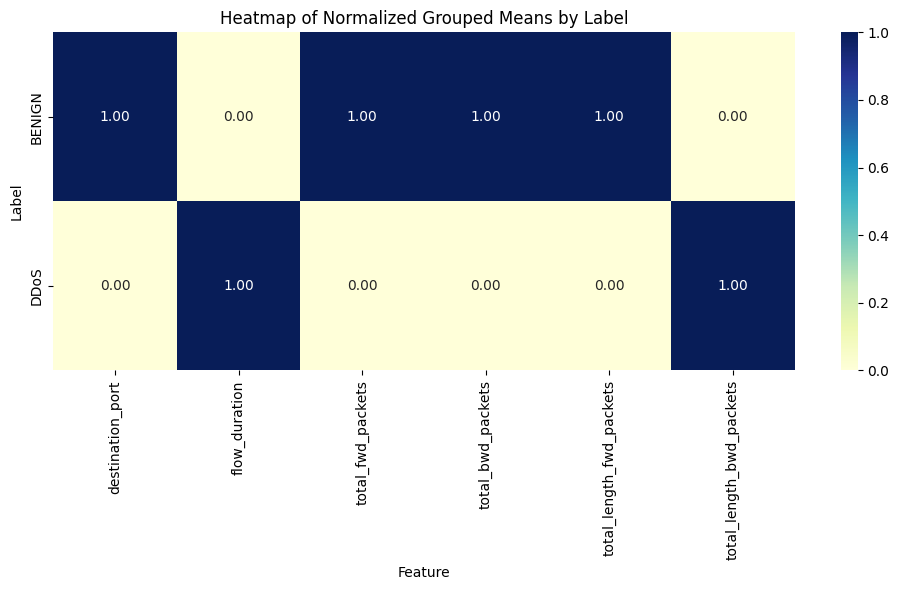

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_means, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Normalized Grouped Means by Label')
plt.ylabel('Label')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


Heat Map Insights

Key Discoveries from This Heatmap
1. Flow Duration is Higher for DDoS:

Makes flow_duration a strong discriminative feature.

2. Packet Counts and Lengths are Higher in BENIGN:

BENIGN flows are typically bidirectional and longer in terms of data exchange.

3. DDoS Attacks Tend to Be One-Way:

Low total_fwd_packets and high total_length_bwd_packets suggest reflection/amplification attack patterns.

4. Destination Ports Are More Diverse in BENIGN:

Attacks often target specific ports repeatedly (e.g., HTTP, DNS).

Rank of Informative Features

1. flow_duration
DDoS flows have significantly longer durations, indicating sustained attack patterns.
2. total_length_bwd_packets
DDoS attacks tend to generate more data in the backward direction, possibly due to reflection/amplification.
3.	total_fwd_packets
BENIGN traffic typically includes more forward packets, reflecting normal client requests.
4.	total_bwd_packets
BENIGN traffic is more balanced, with both forward and backward packets being exchanged.
5.	total_length_fwd_packets
BENIGN traffic carries more payload size in forward flows, typical in regular communication.
6.	destination_port
DDoS traffic often targets specific ports repeatedly, while BENIGN traffic uses a broader range.

PCA

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


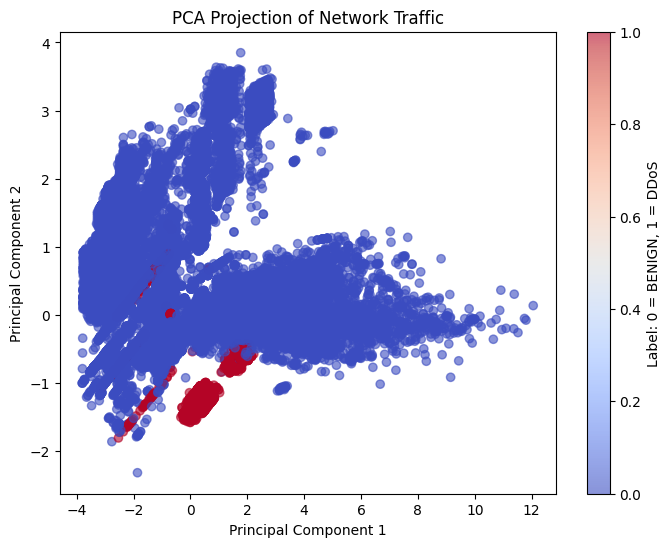

Explained variance ratios: [0.40190149 0.22923596]
Total variance explained by 2 components: 0.6311374543654475


In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Example: Assuming df_clean is your cleaned DataFrame with raw features

# 1. Safe log transform using np.log1p (log(1 + x)) to avoid -inf for zero values
df_clean['log_flow_duration'] = np.log1p(df_clean['flow_duration'])
df_clean['log_total_fwd_packets'] = np.log1p(df_clean['total_fwd_packets'])
df_clean['log_total_bwd_packets'] = np.log1p(df_clean['total_bwd_packets'])
df_clean['log_total_length_fwd_packets'] = np.log1p(df_clean['total_length_fwd_packets'])
df_clean['log_total_length_bwd_packets'] = np.log1p(df_clean['total_length_bwd_packets'])

# 2. Select features for PCA
features_for_pca = [
    'destination_port',
    'log_flow_duration',
    'log_total_fwd_packets',
    'log_total_bwd_packets',
    'log_total_length_fwd_packets',
    'log_total_length_bwd_packets'
]

X = df_clean[features_for_pca].copy()

# 3. Replace inf/-inf with NaN, then drop or fill NaNs
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Option A: Drop rows with NaNs (if you want to keep only clean rows)
X.dropna(inplace=True)

# Option B (alternative): Fill NaNs with zero or column mean
# X.fillna(0, inplace=True)

# 4. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 6. Prepare labels for coloring
# Make sure labels are aligned with X after dropping rows
labels = df_clean.loc[X.index, 'label'] == 'DDoS'  # boolean series

# 7. Plot PCA projection
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='coolwarm', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Network Traffic')
plt.colorbar(scatter, label='Label: 0 = BENIGN, 1 = DDoS')
plt.show()

# 8. Optional: Explained variance
print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Total variance explained by 2 components:", sum(pca.explained_variance_ratio_))

